In [1]:
from post_processing import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = "/Users/arash/Desktop/Uni_semester/Master_Thesis/Codes/Participant_test1/Test_1_JO_raw_data_10012025154959.txt"
output_path = "/Users/arash/Desktop/Uni_semester/Master_Thesis/Codes/Participant_test1/iso_raw_test1.csv"

In [3]:

iso_raw_DF = generate_DF(file_path=filename, output_path=output_path)


cleaned data saved to /Users/arash/Desktop/Uni_semester/Master_Thesis/Codes/Participant_test1/iso_raw_test1.csv


## Plot the Torque , Speed, Angle from isoforce DF

The torque and angle data are LP-filtered !


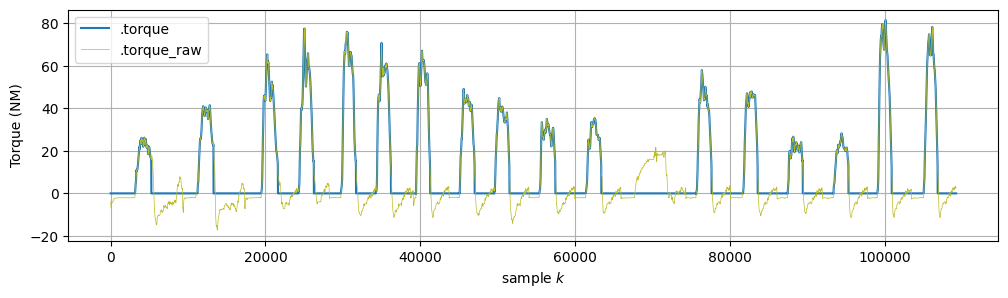

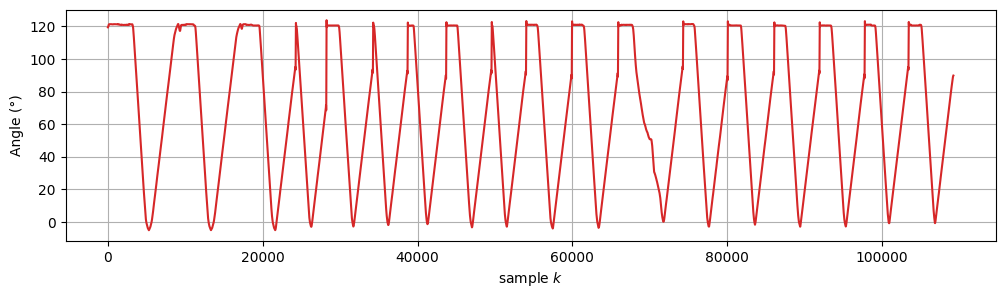

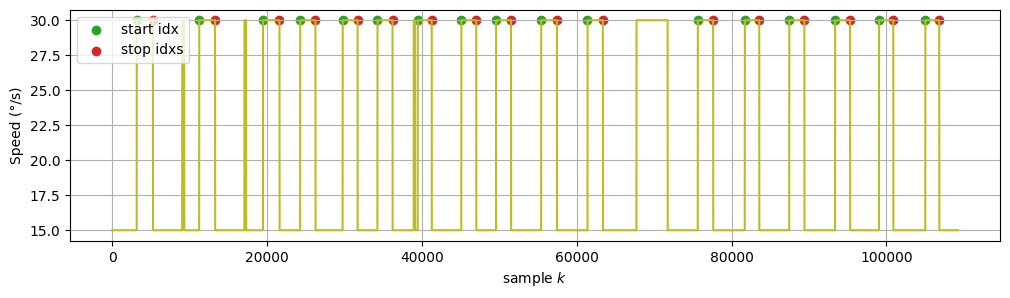

In [4]:
isoforce_iso = IsoForceRAW(iso_raw_DF, LP_filter=True)
isoforce_iso.plot_torque()
isoforce_iso.plot_angle()
isoforce_iso.plot_speed()

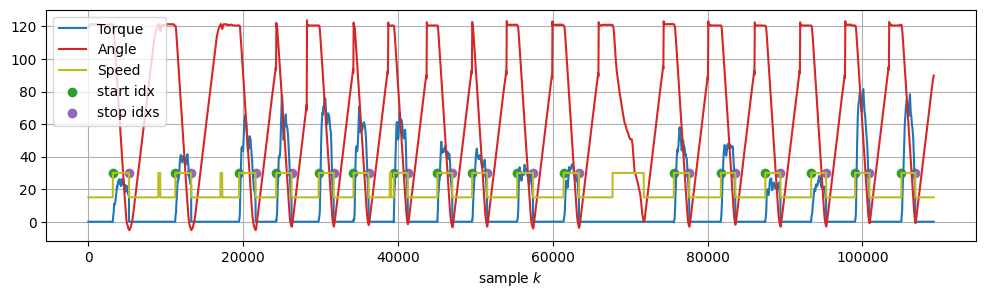

In [5]:
isoforce_iso.plot_data()


## Plot segmented Torque and angle from isoforce DF

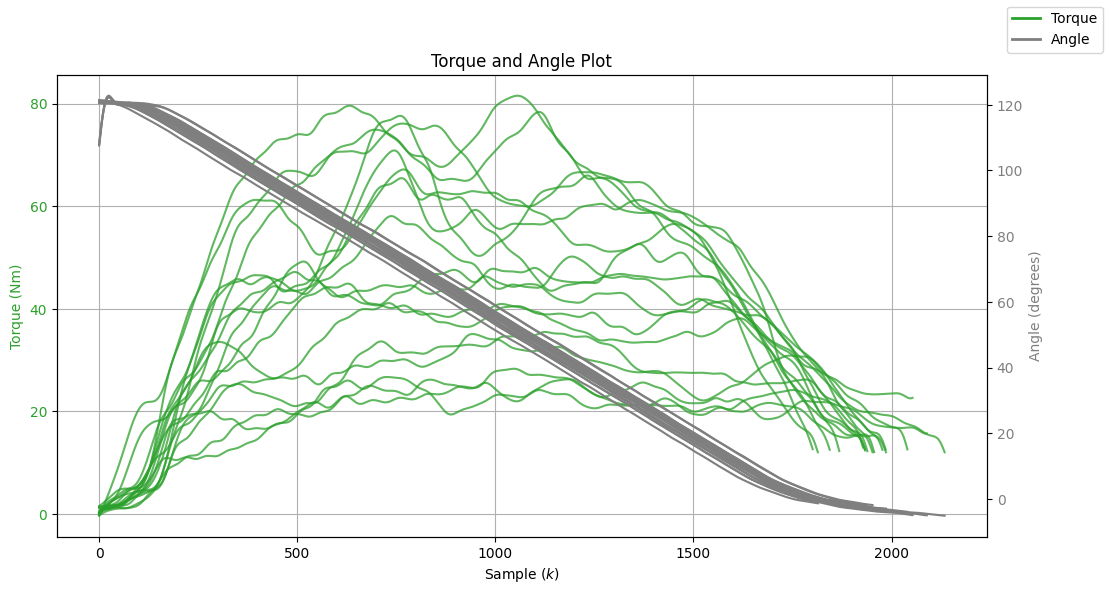

In [6]:
from matplotlib.lines import Line2D
fig, ax1 = plt.subplots(figsize=(12,6)) 

# Plot Torque on the primary y-axis
for idx in range(len(isoforce_iso.torque_segments.keys())):
    ax1.plot(isoforce_iso.torque_segments[f"T_seg_{idx}"], "C2", alpha=0.75)

ax1.set_xlabel("Sample ($k$)")
ax1.set_ylabel("Torque (Nm)", color="C2")
ax1.tick_params(axis="y", labelcolor="C2")
ax1.grid()

# Create a second y-axis for Angle
ax2 = ax1.twinx()  
for idx in range(len(isoforce_iso.angle_segments.keys())):
    ax2.plot(isoforce_iso.angle_segments[f"A_seg_{idx}"], "C7")

ax2.set_ylabel("Angle (degrees)", color="C7")
ax2.tick_params(axis="y", labelcolor="C7")

custom_lines = [
    Line2D([0], [0], color="C2", lw=2, label="Torque"),
    Line2D([0], [0], color="C7", lw=2, label="Angle")
]
fig.legend(handles=custom_lines, loc="upper right")


plt.title("Torque and Angle Plot")
plt.show()


# Isoforce Data Acquisition from NI Chip

The NI chip is equipped with three channels: P, T, and S. Each channel is associated with specific measurement parameters, including a factor and offset, as detailed below:

- **Channel 1 (P):** Angle  
  - Factor: 54  
  - Offset: 12  

- **Channel 2 (T):** Torque  
  - Factor: 150  
  - Offset: 25  

- **Channel 3 (S):** Speed  
  - Factor: 108  
  - Offset: -3  


In [7]:
import os
#base_path_NI = r"D:\EIT\EIT_Thigh_Force_Measurement\GUI_Data_Acquisition\measurements\Participant_test1"
base_path_NI = "/Users/arash/Desktop/Uni_semester/Master_Thesis/Codes/Participant_test1"
src_path_NI = os.path.join(base_path_NI, "Isokinetic_raw")

In [20]:
isoforce_py = IsoForcePy(src_path_NI, LP_filter=True, over_UTC=False, scale_0_1=True)


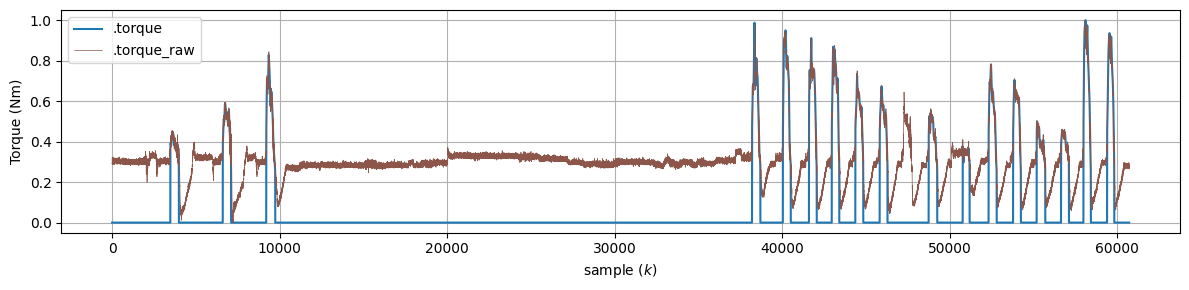

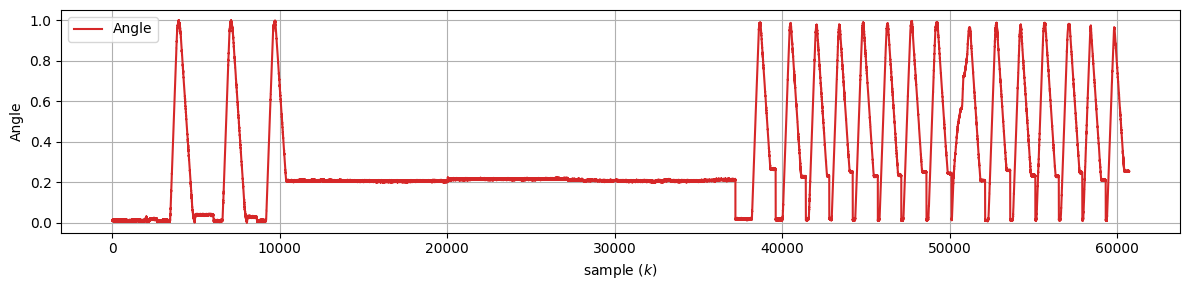

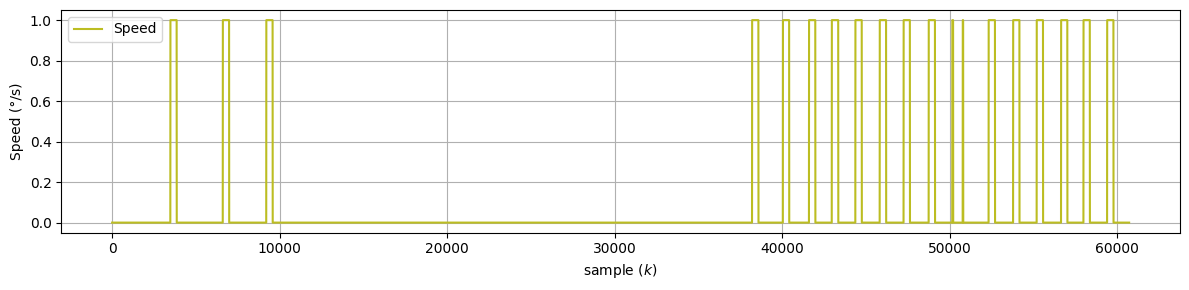

In [22]:
isoforce_py.plot_torque()
isoforce_py.plot_angle()
isoforce_py.plot_speed()


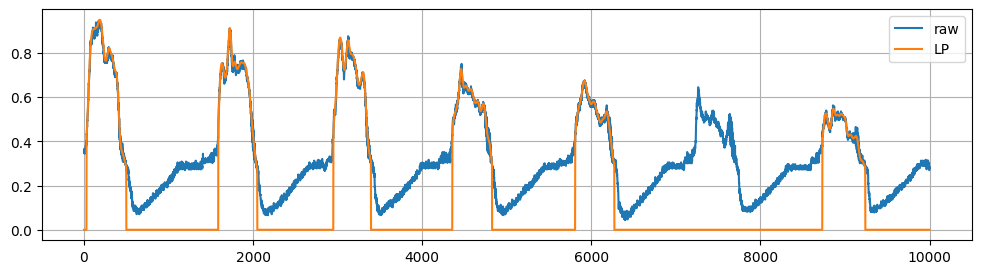

In [23]:
plt.figure(figsize=(12, 3))
plt.plot((isoforce_py.torque_raw[40_000:50_000]), label="raw")
plt.plot((isoforce_py.torque[40_000:50_000]), label="LP")
plt.legend()
plt.grid()

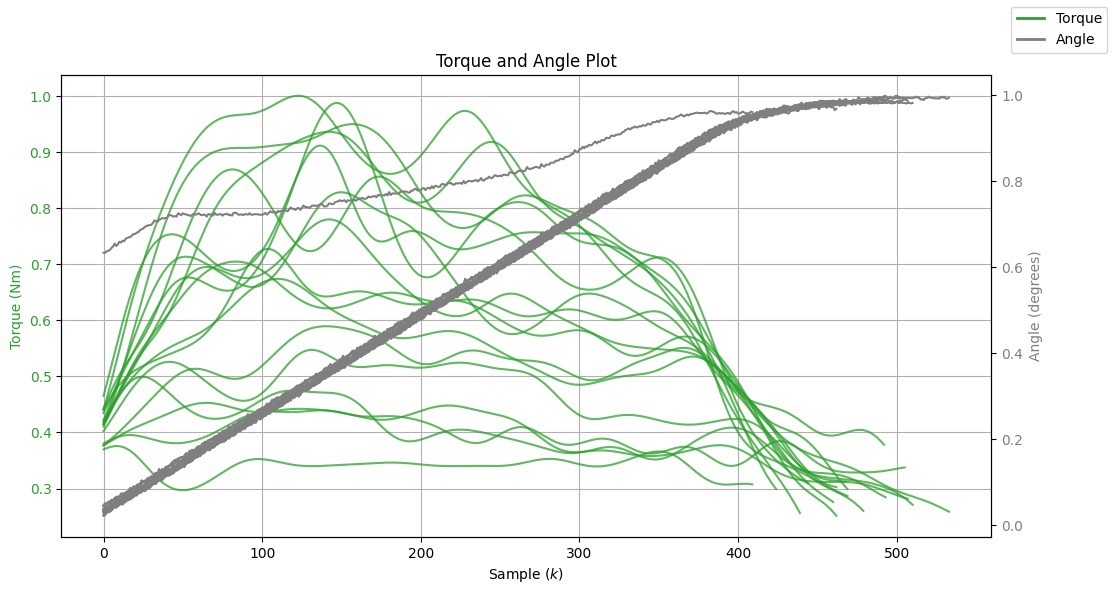

In [25]:
from matplotlib.lines import Line2D
fig, ax1 = plt.subplots(figsize=(12,6)) 

# Plot Torque on the primary y-axis
for idx in range(len(isoforce_py.torque_segments.keys())):
    ax1.plot(isoforce_py.torque_segments[f"T_seg_{idx}"], "C2", alpha=0.75)

ax1.set_xlabel("Sample ($k$)")
ax1.set_ylabel("Torque (Nm)", color="C2")
ax1.tick_params(axis="y", labelcolor="C2")
ax1.grid()

# Create a second y-axis for Angle
ax2 = ax1.twinx()  
for idx in range(len(isoforce_py.angle_segments.keys())):
    ax2.plot(isoforce_py.angle_segments[f"A_seg_{idx}"], "C7")

ax2.set_ylabel("Angle (degrees)", color="C7")
ax2.tick_params(axis="y", labelcolor="C7")

custom_lines = [
    Line2D([0], [0], color="C2", lw=2, label="Torque"),
    Line2D([0], [0], color="C7", lw=2, label="Angle")
]
fig.legend(handles=custom_lines, loc="upper right")


plt.title("Torque and Angle Plot")
plt.show()


## Synchronization between `IsoForceRaw` and `IsoForcePy`

In [26]:
len(isoforce_iso.torque_segments.keys()), len(isoforce_py.torque_segments.keys())


(17, 17)

In [27]:
from scipy.signal import resample


def resample_signals(iso_iso, iso_py, target_length=None):
    iso_iso = np.asarray(iso_iso)
    iso_py = np.asarray(iso_py)
    if target_length:
        print(f"Resample both signals to a length of {target_length} samples.")
        iso_py = resample(iso_py, num=target_length)
        iso_iso = resample(iso_iso, num=target_length)
        return iso_iso, iso_py
    else:
        target_length = max(len(iso_iso), len(iso_py))
        print(f"Resample both signals to a length of {target_length} samples.")
        if len(iso_iso) > len(iso_py):
            iso_py = resample(iso_py, num=target_length)
        elif len(iso_py) > len(iso_iso):
            iso_iso = resample(iso_iso, num=target_length)
        return iso_iso, iso_py


def detect_shift(signal1, signal2):
    N = max(len(signal1), len(signal2))
    corr = np.correlate(signal1, signal2, mode="full")
    lags = np.arange(-N + 1, N)

    max_corr_idx = np.argmax(corr)
    discrete_time_shift = lags[max_corr_idx]
    print(f"Discrete time shift of {discrete_time_shift}.")
    return discrete_time_shift

Resample both signals to a length of 2090 samples.
Discrete time shift of 276.
Resample both signals to a length of 1500 samples.


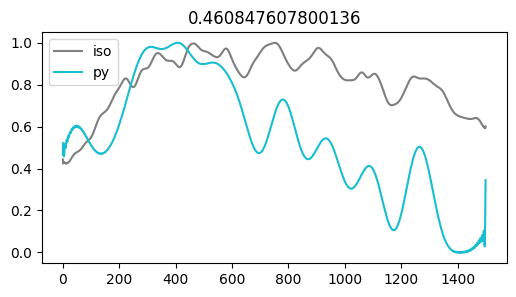

Resample both signals to a length of 2054 samples.
Discrete time shift of 144.
Resample both signals to a length of 1500 samples.


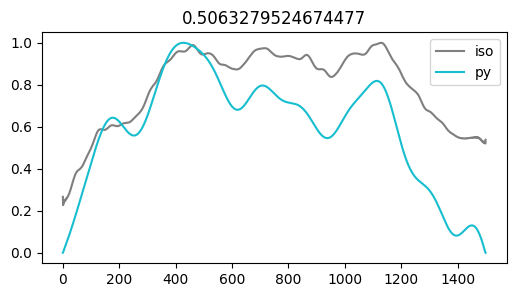

Resample both signals to a length of 2135 samples.
Discrete time shift of 172.
Resample both signals to a length of 1500 samples.


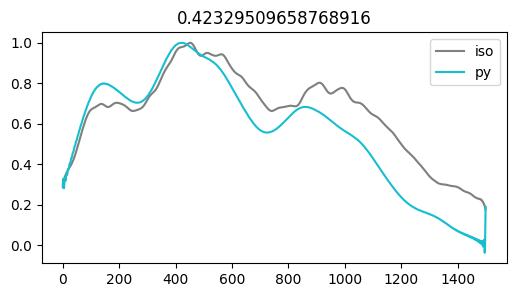

Resample both signals to a length of 1978 samples.
Discrete time shift of 171.
Resample both signals to a length of 1500 samples.


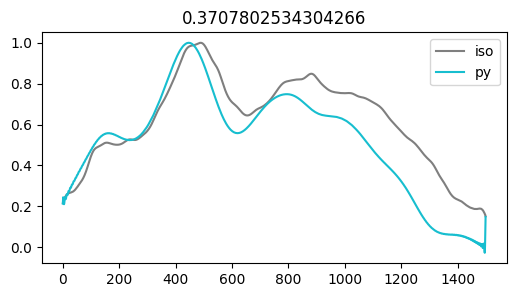

Resample both signals to a length of 1934 samples.
Discrete time shift of 178.
Resample both signals to a length of 1500 samples.


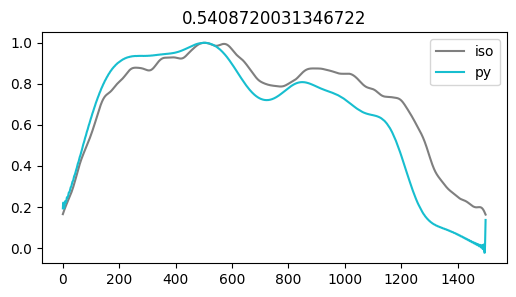

Resample both signals to a length of 1953 samples.
Discrete time shift of 175.
Resample both signals to a length of 1500 samples.


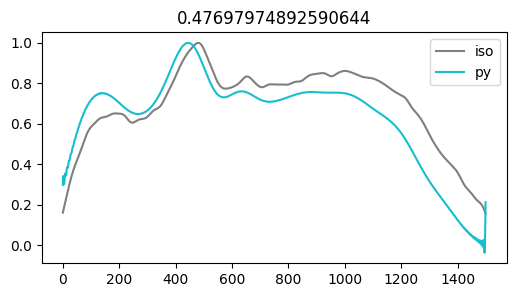

Resample both signals to a length of 1815 samples.
Discrete time shift of 80.
Resample both signals to a length of 1500 samples.


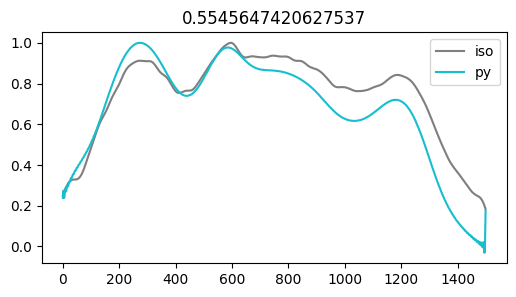

Resample both signals to a length of 1929 samples.
Discrete time shift of 106.
Resample both signals to a length of 1500 samples.


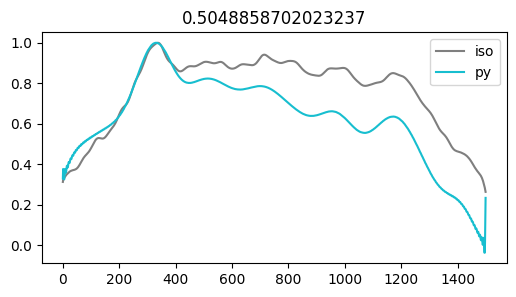

Resample both signals to a length of 1940 samples.
Discrete time shift of 148.
Resample both signals to a length of 1500 samples.


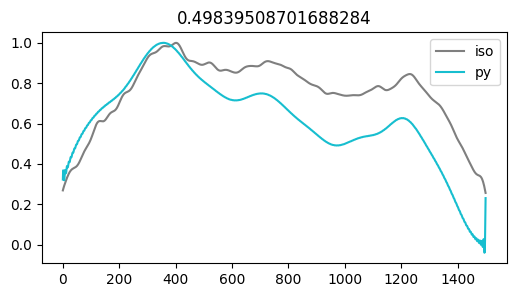

Resample both signals to a length of 2041 samples.
Discrete time shift of 181.
Resample both signals to a length of 1500 samples.


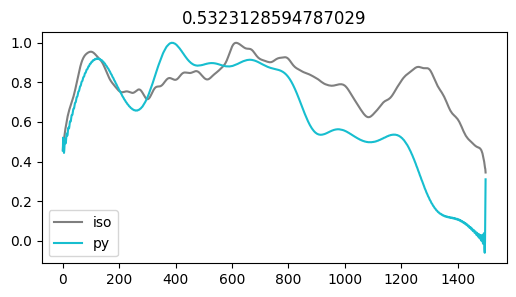

Resample both signals to a length of 1986 samples.
Discrete time shift of 180.
Resample both signals to a length of 1500 samples.


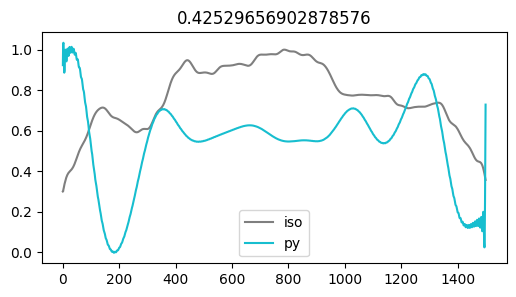

Resample both signals to a length of 1987 samples.
Discrete time shift of 195.
Resample both signals to a length of 1500 samples.


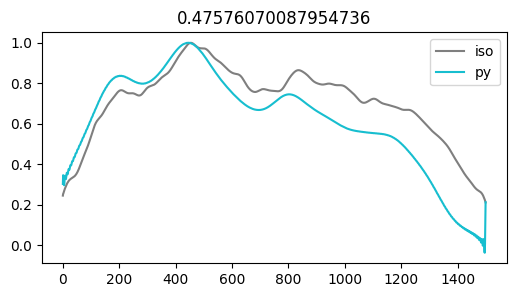

Resample both signals to a length of 1869 samples.
Discrete time shift of 154.
Resample both signals to a length of 1500 samples.


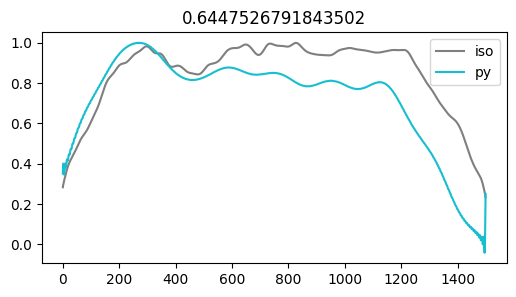

Resample both signals to a length of 1957 samples.
Discrete time shift of 173.
Resample both signals to a length of 1500 samples.


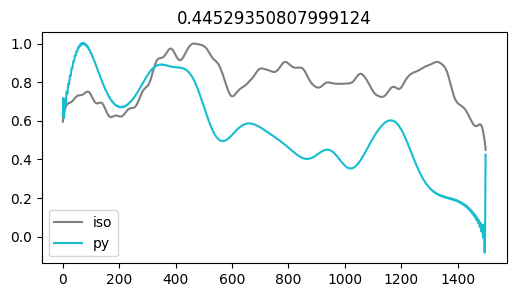

Resample both signals to a length of 1934 samples.
Discrete time shift of 231.
Resample both signals to a length of 1500 samples.


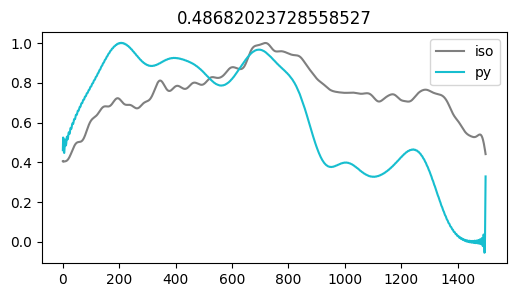

Resample both signals to a length of 1845 samples.
Discrete time shift of 141.
Resample both signals to a length of 1500 samples.


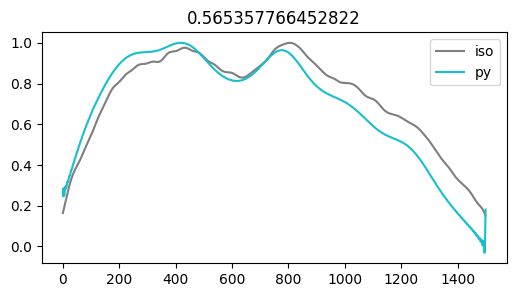

Resample both signals to a length of 1802 samples.
Discrete time shift of 106.
Resample both signals to a length of 1500 samples.


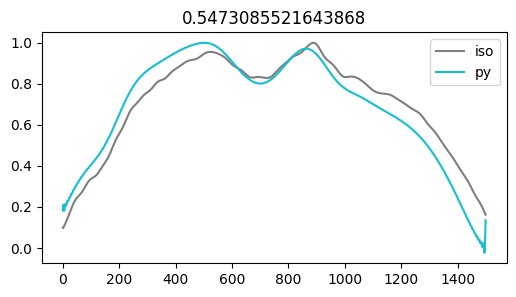

In [28]:
for idx in range(
    min(
        len(isoforce_iso.torque_segments.keys()),
        len(isoforce_py.torque_segments.keys()),
    )
):
    # scale the amplitude rage to [0,1].
    iso_seg = scale_to_range(isoforce_iso.torque_segments[f"T_seg_{idx}"])
    py_seg = scale_to_range(isoforce_py.torque_segments[f"T_seg_{idx}"])
    # create two signals of same length and compute the phase shift.
    iso_seg_corr, py_seg_corr = resample_signals(iso_seg, py_seg)
    shift = detect_shift(iso_seg_corr, py_seg_corr)
    # resample the original, amplitude scaled signals to a constant lenght
    iso_seg, py_seg = resample_signals(iso_seg[shift:], py_seg, target_length=1500)

    plt.figure(figsize=(6, 3))
    plt.title(np.correlate(iso_seg, py_seg)[0] / len(iso_seg))
    # plt.show()
    plt.plot(iso_seg, "C7", label="iso")
    plt.plot(py_seg, "C9", label="py")
    plt.legend()
    plt.show()

In [29]:
for start, stop in zip(isoforce_py.start_idxs, isoforce_py.stop_idxs):
    print("from", isoforce_py.time[start], "to", isoforce_py.time[stop])
    print("Δt", isoforce_py.time[stop] - isoforce_py.time[start])

from 3473 to 3979
Δt 506
from 6602 to 7095
Δt 493
from 9197 to 9731
Δt 534
from 38191 to 38685
Δt 494
from 40030 to 40500
Δt 470
from 41588 to 42049
Δt 461
from 42949 to 43394
Δt 445
from 44356 to 44826
Δt 470
from 45809 to 46272
Δt 463
from 48732 to 49240
Δt 508
from 50763 to 51173
Δt 410
from 52309 to 52789
Δt 480
from 53771 to 54234
Δt 463
from 55178 to 55689
Δt 511
from 56633 to 57102
Δt 469
from 57970 to 58410
Δt 440
from 59382 to 59807
Δt 425
